In [12]:
# %% 
import os
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

# %%


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])
batch_size = 128

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
def __len__(self):
    return len(self.images)

def output_label(label):
    output_mapping = {
                0: "T-shirt/Top",
                1: "Trouser",
                2: "Pullover",
                3: "Dress",
                4: "Coat", 
                5: "Sandal", 
                6: "Shirt",
                7: "Sneaker",
                8: "Bag",
                9: "Ankle Boot"
                }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]


In [5]:
          
class FashionCNN(nn.Module):

    def __init__(self):
        super(FashionCNN, self).__init__()
    
        self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=64, kernel_size=2),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
        
    )
        self.drop1 = nn.Dropout2d(0.25)
        
        self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2),
        nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.drop2 = nn.Dropout2d(0.25)
        
        self.layer3 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2),
        nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.drop3 = nn.Dropout2d(0.25)
        
        self.layer4 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2),
        nn.BatchNorm2d(64),
            nn.ReLU(),
            
        )
        self.drop4 = nn.Dropout2d(0.25)
        
        self.fc1 = nn.Linear(in_features=64, out_features=10)
        self.soft=nn.Softmax()
        self.drop5 = nn.Dropout2d(0.25)
        #self.fc2 = nn.Linear(in_features=600, out_features=120)
        # self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.drop1(out)/search
        out = self.layer2(out)
        out = self.drop2(out)
        out = self.layer3(out)
        out = self.drop3(out)
        out = self.layer4(out)
        out = self.drop4(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.soft(out)
        out = self.drop5(out)
        #out = self.fc2(out)
        # out = self.fc3(out)
        
        return out   

In [6]:
# plt.imshow(trainset[0].numpy().squeeze(), cmap='gray_r');  
model = FashionCNN()
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.002
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(2, 2), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop1): Dropout2d(p=0.25, inplace=False)
  (layer2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop2): Dropout2d(p=0.25, inplace=False)
  (layer3): Sequential(
    (0): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop3): Dropout2d(p=0.25, inplace=False)
  (layer4): Sequential(
    (

In [7]:
# num_epochs = 50
# count = 0
# # Lists for visualization of loss and accuracy 
# loss_list = []
# iteration_list = []
# accuracy_list = []

# # Lists for knowing classwise accuracy
# predictions_list = []
# labels_list = []

# for epoch in range(num_epochs):
#     for images, labels in trainloader:
#         # Transfering images and labels to GPU if available
#         images, labels = images.to(device), labels.to(device)        
#         # Forward pass 
#         outputs = model(images)
#         loss = error(outputs, labels)
        
#         # Initializing a gradient as 0 so there is no mixing of gradient among the batches
#         optimizer.zero_grad()
        
#         #Propagating the error backward
#         loss.backward()
        
#         # Optimizing the parameters
#         optimizer.step()
    
#         count += 1
#         # Testing the model
    
#         if not (count % 50):    # It's same as "if count % 50 == 0"
#             total = 0
#             correct = 0
        
#             for images, labels in testloader:
#                 images, labels = images.to(device), labels.to(device)
#                 labels_list.append(labels)
            
#                 outputs = model(images)
            
#                 predictions = torch.max(outputs, 1)[1].to(device)
#                 predictions_list.append(predictions)
#                 correct += (predictions == labels).sum()
            
#                 total += len(labels)
            
#             accuracy = correct * 100 / total
#             loss_list.append(loss.data)
#             iteration_list.append(count)
#             accuracy_list.append(accuracy)
        
#         if not (count % 500):
#             print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))



In [8]:
net = model
criterion = error
data_loader = {
    "train": trainloader,
    "val": testloader,
}

dataset_sizes = {
    "train": len(trainset),
    "val": len(testset)
}

In [9]:
# def draw_curve(current_epoch, optimizer_name, loss_name, res):
#     x_epoch = list(range(current_epoch))
#     loss_train = res["loss_train"]
#     loss_val = res["loss_val"]
#     plt.plot(x_epoch, loss_train, 'bo-', label='train')
#     plt.plot(x_epoch, loss_val, 'ro-', label='val')

#     if current_epoch == 0:
#         plt.legend()
#     os.makedirs("loss_graphs", exist_ok=True)
#     plt.savefig(os.path.join('./loss_graphs',
#                 f'train_{optimizer_name}_{loss_name}.jpg'))

# def train(epochs=100):
#     path = "model"
#     os.makedirs(path, exist_ok=True)
#     state_file_name = f"{path}/state-{net._get_name()}.pth"
#     state_res = {}

#     if os.path.exists(state_file_name):
#         print("files name")
#         state = torch.load(state_file_name)
#         net.load_state_dict(state["state_dict"])
#         optimizer.load_state_dict(state["optimizer"])
#         state_res = state["res"]

#     else:
#         print("Not file")
#     res = {
#         "loss_train": state_res.get("loss_train", []),
#         "loss_val": state_res.get("loss_val", []),
#         "epoch": state_res.get("epoch", 0),
#     }
#     res["epoch"]

#     for epoch in range(res["epoch"]+1, epochs):  # loop over the dataset multiple times
#         running_loss = 0.0
#         phase_loss = 0
#         for phase in ["train", "val"]:
#             if phase == "train":
#                 net.train(True)  # Set model to training mode
#             else:
#                 net.train(False)  # Set model to evaluate mode
#             for i, data in enumerate(data_loader[phase], 0):
#                 # get the inputs; data is a list of [inputs, labels]
#                 inputs, labels = data
#                 inputs = inputs.to(device)
#                 labels = labels.to(device)
#                 now_batch_size = labels.size()[0]
#                 # zero the parameter gradients
#                 optimizer.zero_grad()
#                 # forward + backward + optimize
#                 outputs = net(inputs)
#                 loss = criterion(outputs, labels)
#                 if phase == "train":
#                     loss.backward()
#                     optimizer.step()
#                 # print statistics
#                 phase_loss += loss.item() * now_batch_size
#                 running_loss += loss.item()
#                 if i % 200 == 199 and phase == "train":
#                     print(
#                         f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.4f}')
#                     running_loss = 0.0
#             phase_loss = phase_loss / dataset_sizes[phase]
#             # y_loss[phase].append(phase_loss)
#             res[f"loss_{phase}"].append(phase_loss)
#             res["epoch"] = epoch
#         print(
#             f"Epoch {epoch + 1} loss: {res['loss_train'][-1]:.8f} val: {res['loss_val'][-1]:.8f}")
#         draw_curve(epoch, optimizer_name=optimizer.__class__.__name__,
#                    loss_name=criterion.__class__.__name__, res=res)

#         state = {
#             "epoch": epoch,
#             "state_dict": net.state_dict(),
#             "optimizer": optimizer.state_dict(),
#             "res": res
#         }
#         torch.save(state, state_file_name)

In [14]:
def draw_curve(current_epoch, optimizer_name, loss_name, res):
    x_epoch = list(range(current_epoch))
    loss_train = res["loss_train"]
    loss_val = res["loss_val"]
    plt.plot(x_epoch, loss_train, 'bo-', label='train')
    plt.plot(x_epoch, loss_val, 'ro-', label='val')

    if current_epoch == 0:
        plt.legend()
    os.makedirs("loss_graphs", exist_ok=True)
    plt.savefig(os.path.join('./loss_graphs',
                f'train_{optimizer_name}_{loss_name}.jpg'))

def train(epochs=20):
    path = "model"
    state_file_name = f"{path}/state-{net._get_name()}.pth"
    state_res = {}

    print(state_file_name, end=" ")
    if os.path.exists(state_file_name):
        print("exist")
        state = torch.load(state_file_name)
        net.load_state_dict(state["state_dict"])
        optimizer.load_state_dict(state["optimizer"])
        state_res = state["res"]

    else:
        print("Not exist")
    res = {
        "loss_train": state_res.get("loss_train", []),
        "loss_val": state_res.get("loss_val", []),
        "epoch": state_res.get("epoch", 0),
    }
    res["epoch"]

    # loop over the dataset multiple times
    for epoch in range(res["epoch"]+1, epochs):
        running_loss = 0.0
        phase_loss = 0
        for phase in ["train", "val"]:
            if phase == "train":
                net.train(True)  # Set model to training mode
            else:
                net.train(False)  # Set model to evaluate mode
            for i, data in enumerate(data_loader[phase], 0):
                # get the inputs; data is a list of [inputs, labels]
                inputs, labels = data
                inputs = inputs.to(device)
                labels = labels.to(device)
                now_batch_size = labels.size()[0]
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward + backward + optimize
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                if phase == "train":
                    loss.backward()
                    optimizer.step()
                # print statistics
                phase_loss += loss.item() * now_batch_size
                running_loss += loss.item()
                if i % 200 == 199 and phase == "train":
                    print(
                        f'[{epoch}, {i + 1:5d}] loss: {running_loss / 2000:.4f}')
                    running_loss = 0.0
            phase_loss = phase_loss / dataset_sizes[phase]
            # y_loss[phase].append(phase_loss)
            res[f"loss_{phase}"].append(phase_loss)
            res["epoch"] = epoch
        print(
            f"Epoch {epoch} loss: {res['loss_train'][-1]:.8f} val: {res['loss_val'][-1]:.8f}")
        draw_curve(epoch, optimizer_name=optimizer.__class__.__name__,
                   loss_name=criterion.__class__.__name__, res=res)

        state = {
            "epoch": epoch,
            "state_dict": net.state_dict(),
            "optimizer": optimizer.state_dict(),
            "res": res
        }
        torch.save(state, state_file_name)


model/state-FashionCNN.pth exist


/tmp/ipykernel_452766/3359979482.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.soft(out)
/home/amir/uni/venv/lib/python3.9/site-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


[55,   200] loss: 0.1596
[55,   400] loss: 0.1596
Epoch 55 loss: 1.59655378 val: 1.56664680


/tmp/ipykernel_452766/3359979482.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.soft(out)
/home/amir/uni/venv/lib/python3.9/site-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


[56,   200] loss: 0.1601
[56,   400] loss: 0.1597
Epoch 56 loss: 1.59809034 val: 1.56457340


/tmp/ipykernel_452766/3359979482.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.soft(out)
/home/amir/uni/venv/lib/python3.9/site-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


[57,   200] loss: 0.1599
[57,   400] loss: 0.1593
Epoch 57 loss: 1.59443024 val: 1.56479928


/tmp/ipykernel_452766/3359979482.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.soft(out)
/home/amir/uni/venv/lib/python3.9/site-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


[58,   200] loss: 0.1596
[58,   400] loss: 0.1594
Epoch 58 loss: 1.59501035 val: 1.56331291


/tmp/ipykernel_452766/3359979482.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.soft(out)
/home/amir/uni/venv/lib/python3.9/site-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


[59,   200] loss: 0.1599
[59,   400] loss: 0.1595
Epoch 59 loss: 1.59764017 val: 1.56468999


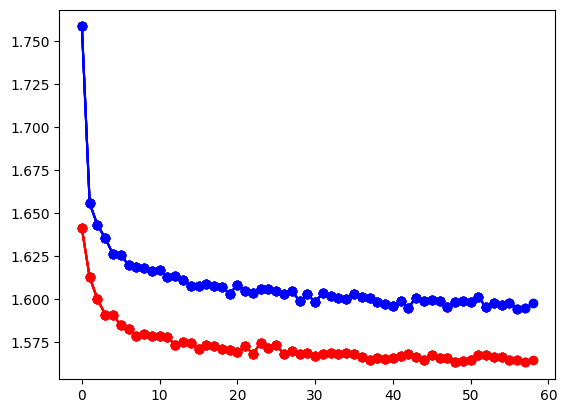

In [15]:
train(60)

In [17]:

# net = FashionCNN().to(device)
# since we're not training, we don't need to calculate the gradients for our outputs
y_true = []
y_pred = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        for a, b in zip(labels, predicted):
            # print(a.item(), b.item())
            y_true.append(a.item())
            y_pred.append(b.item())
        # break
        # the class with the highest energy is what we choose as prediction
        # _, predicted = torch.max(outputs.data, 1)
        # total += labels.size(0)
        # correct += (predicted == labels).sum().item()



# %%
print("f1", f1_score(y_true, y_pred, average="macro"))
# %%
print("pre", precision_score(y_true, y_pred, average="macro"))
# %%
print("acc", accuracy_score(y_true, y_pred))
# %%


/tmp/ipykernel_452766/3359979482.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.soft(out)
/home/amir/uni/venv/lib/python3.9/site-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.88      0.85      1000
           3       0.89      0.90      0.90      1000
           4       0.83      0.83      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.68      0.70      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

f1 0.8957035794993379
pre 0.8959052273263224
acc 0.896
